In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
myData = pd.read_csv('C:/Users/FORGE-15 I7/Downloads/Amazon_Unlocked_Mobile.csv')
myData = myData.dropna(axis=0, subset=['Reviews'])
myData

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


#### Total number of products in dataset

In [3]:
product_name = []
for item in myData["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

len(product_name)

4410

#### Total number of brands in dataset

In [13]:
brands = []
for item in myData["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)
        
len(brands)
brands

['Samsung',
 'Nokia',
 nan,
 'HTM',
 'Jethro',
 'e passion',
 'Cedar Tree Technologies',
 'Indigi',
 'Phone Baby',
 'OtterBox',
 'Lenovo',
 'Huawei',
 'JUNING',
 'Elephone',
 'Plum',
 'VKworld',
 'NOKIA',
 'Ulefone',
 'Jiuhe',
 'inDigi',
 'Acer',
 'Aeku',
 'AKUA',
 'Alcatel',
 'TCL Mobile',
 'LG',
 'amar',
 'Amazon',
 'Odysseus',
 'Digital SNITCH',
 'star',
 'Android',
 'Yezz',
 'Yezz Wireless Ltd.',
 'Apple',
 'Apple Computer',
 'Certified Refurbished',
 'Amazon.com, LLC *** KEEP PORules ACTIVE ***',
 'apple',
 'ARGOM TECH',
 'Asus',
 'ASUS',
 'ASUS Computers',
 'asus',
 'BlackBerry',
 'Motorola',
 'Palm',
 'Pantech',
 'ZTE',
 'ATT',
 'UnAssigned',
 'Atoah',
 'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
 'WorryFree Gadgets',
 'worryfree',
 'iDROID USA',
 'Blackberry (Rim)',
 'Research In Motion',
 'BLACKBERRY',
 'Black Berry',
 'Blackberry',
 'blackberry',
 'RIM',
 'Research in Motion',
 'Blackberrry',
 'Storm',
 'B

In [266]:
df = pd.DataFrame(myData)
df.rename(columns = {'Product Name':'Product', 'Brand Name':'Brand', 'Review Votes':'ReviewVotes'}, inplace = True) 
df.to_csv (r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\newDF.csv', index = False, header=True)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\FORGE-15 I7\\OneDrive - AsiaPay Limited\\Sem 2\\Project\\Dataset\\newDF.csv'

In [338]:
newData = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\newDF.csv')
newData['Brand'] = newData['Brand'].str.lower() 

In [310]:
sum(newData['Brand'].isnull())

65155

In [339]:
newData["Brand"].fillna("Undefined", inplace = True) 

In [101]:
# creating bool series False for NaN values 
bool_series = newData['Brand'].isnull()
  
# displayed data only with team = NaN 
newData[bool_series] 

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes


In [340]:
newBrand = []

for i in range(len(newData)):
    if 'acer' in newData['Brand'][i]:
        newBrand.append('Acer')
    elif 'alcatel' in newData['Brand'][i]:
        newBrand.append('Alcatel')
    elif  'akua' in newData['Brand'][i]:
        newBrand.append('AKUA')
    elif  'aeku' in newData['Brand'][i]:
        newBrand.append('Aeku')
    elif  'apple' in newData['Brand'][i]:
        newBrand.append('Apple')
    elif  'asus' in newData['Brand'][i]:
        newBrand.append('ASUS')
    elif  'blackberry' in newData['Brand'][i]:
        newBrand.append('BlackBerry')
    elif  'blackview' in newData['Brand'][i]:
        newBrand.append('Blackview')
    elif  'blu' in newData['Brand'][i]:
        newBrand.append('BLU')
    elif  'casio' in newData['Brand'][i]:
        newBrand.append('Casio')
    elif  'cat' in newData['Brand'][i]:
        newBrand.append('Cat')
    elif  'coolpad' in newData['Brand'][i]:
        newBrand.append('Coolpad')
    elif  'cubot' in newData['Brand'][i]:
        newBrand.append('CUBOT')
    elif  'doogee' in newData['Brand'][i]:
        newBrand.append('DOOGEE')
    elif  'google' in newData['Brand'][i]:
        newBrand.append('Google')
    elif  'honor' in newData['Brand'][i]:
        newBrand.append('Honor')
    elif  'htc' in newData['Brand'][i]:
        newBrand.append('HTC')
    elif  'htm' in newData['Brand'][i]:
        newBrand.append('HTM')
    elif  'huawei' in newData['Brand'][i]:
        newBrand.append('Huawei')
    elif  'indigi' in newData['Brand'][i]:
        newBrand.append('Indigi')
    elif  'juning' in newData['Brand'][i]:
        newBrand.append('JUNING')
    elif  'kyocera' in newData['Brand'][i]:
        newBrand.append('Kyocera')
    elif  'lenovo' in newData['Brand'][i]:
        newBrand.append('Lenovo')
    elif  'l8star' in newData['Brand'][i]:
        newBrand.append('L8star')
    elif  'lg' in newData['Brand'][i]:
        newBrand.append('LG')
    elif  'motorola' in newData['Brand'][i]:
        newBrand.append('Motorola')
    elif  'nokia' in newData['Brand'][i]:
        newBrand.append('Nokia')
    elif  'nuu' in newData['Brand'][i]:
        newBrand.append('NUU')
    elif  'oneplus' in newData['Brand'][i]:
        newBrand.append('OnePlus')
    elif  'polaroid' in newData['Brand'][i]:
        newBrand.append('Polaroid')
    elif  'posh mobile' in newData['Brand'][i]:
        newBrand.append('Posh Mobile')
    elif  'oukitel' in newData['Brand'][i]:
        newBrand.append('Oukitel')
    elif  'razer' in newData['Brand'][i]:
        newBrand.append('Razer')
    elif  'rca' in newData['Brand'][i]:
        newBrand.append('RCA')
    elif  'realme' in newData['Brand'][i]:
        newBrand.append('realme')
    elif  's smooth' in newData['Brand'][i]:
        newBrand.append('s smooth')
    elif  'samsung' in newData['Brand'][i]:
        newBrand.append('Samsung')
    elif  'sony' in newData['Brand'][i]:
        newBrand.append('Sony')
    elif  'sudroid' in newData['Brand'][i]:
        newBrand.append('Sudroid')
    elif  'ulefone' in newData['Brand'][i]:
        newBrand.append('Ulefone')
    elif  'umidigi' in newData['Brand'][i]:
        newBrand.append('UMIDIGI')
    elif  'ushining' in newData['Brand'][i]: 
        newBrand.append('USHINING')
    elif  'xgody' in newData['Brand'][i]:
        newBrand.append('XGODY')
    elif  'xiaomi' in newData['Brand'][i]:
        newBrand.append('Xiaomi')
    elif  'verykool' in newData['Brand'][i]:
        newBrand.append('verykool')
    elif  'zte' in newData['Brand'][i]:
        newBrand.append('ZTE') 
    else:
        newBrand.append('Others')

In [341]:
newData['Brand'] = newBrand

In [342]:
sum(newData['Brand'] == 'Others')

102242

In [343]:
df1 = newData[newData['Brand'] != 'Others']
df1

,Product,Brand,Price,Rating,Reviews,ReviewVotes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413773,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413774,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413775,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413776,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [344]:
df2 = newData[newData['Brand'] == 'Others']
df2

,Product,Brand,Price,Rating,Reviews,ReviewVotes
110,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,2,when i got phone it wouldn't work I took it to...,0.0
111,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,4,I liked,0.0
112,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,5,Great. Arrived quickly.,0.0
113,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,4,"Phone works great, you may have to get a sum c...",0.0
114,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,5,Avianna LLC is an incredible seller. The phone...,0.0
...,...,...,...,...,...,...
413035,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,Others,167.22,5,EXCELENTE,0.0
413036,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,Others,167.22,2,Not as expected so I returned this phone,0.0
413037,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,Others,167.22,5,very well,0.0
413038,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,Others,167.22,5,excelente,0.0


In [361]:
keyword = ['phone', 'smartphone'] #\b that means "word boundary".
unwantedkeyword = ['watch', 'smartwatch', 'case']
df3 = df2[df2['Product'].str.contains('|'.join(keyword), case=False)]
df3 = df3[~df3['Product'].str.contains('|'.join(unwantedkeyword), case=False)]
#df3 = df2[~df2['Brand'].str.contains('|'.join(unwantedword))]

In [362]:
df3

,Product,Brand,Price,Rating,Reviews,ReviewVotes
110,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,2,when i got phone it wouldn't work I took it to...,0.0
111,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,4,I liked,0.0
112,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,5,Great. Arrived quickly.,0.0
113,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,4,"Phone works great, you may have to get a sum c...",0.0
114,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Others,269.10,5,Avianna LLC is an incredible seller. The phone...,0.0
...,...,...,...,...,...,...
412787,ZTE Groove X501 Cricket Phone,Others,31.11,2,Delivery expectation was great. But unfortunat...,1.0
412992,ZTE Sprint S155 Wego Kids Cell Phone,Others,21.77,1,"unable to use this; according to my DIL, only ...",0.0
412993,ZTE Sprint S155 Wego Kids Cell Phone,Others,21.77,1,Got it and it has service but won't let me con...,0.0
412994,ZTE Sprint S155 Wego Kids Cell Phone,Others,21.77,1,This is just a copy of answer I provided earli...,2.0


In [363]:
df3.loc[df3['Product'].str.contains('acer', na=False, case=False), 'Brand'] = 'Acer'
df3.loc[df3['Product'].str.contains('alcatel', case=False), 'Brand'] = 'Alcatel'
df3.loc[df3['Product'].str.contains('akua', case=False), 'Brand'] = 'AKUA'
df3.loc[df3['Product'].str.contains('aeku', case=False), 'Brand'] = 'Aeku'
df3.loc[df3['Product'].str.contains('apple', case=False), 'Brand'] = 'Apple'
df3.loc[df3['Product'].str.contains('asus', case=False), 'Brand'] = 'ASUS'
df3.loc[df3['Product'].str.contains('blackberry', case=False), 'Brand'] = 'BlackBerry'
df3.loc[df3['Product'].str.contains('blackview', case=False), 'Brand'] = 'Blackview'
df3.loc[df3['Product'].str.contains('blu', case=False), 'Brand'] = 'BLU'
df3.loc[df3['Product'].str.contains('casio', case=False), 'Brand'] = 'Casio'
df3.loc[df3['Product'].str.contains('caterpillar', case=False), 'Brand'] = 'Cat'
df3.loc[df3['Product'].str.contains('coolpad', case=False), 'Brand'] = 'Coolpad'
df3.loc[df3['Product'].str.contains('cubot', case=False), 'Brand'] = 'CUBOT'
df3.loc[df3['Product'].str.contains('doogee', na=False, case=False), 'Brand'] = 'DOOGEE'
df3.loc[df3['Product'].str.contains('google', case=False), 'Brand'] = 'Google'
df3.loc[df3['Product'].str.contains('honor', case=False), 'Brand'] = 'Honor'
df3.loc[df3['Product'].str.contains('htc', case=False), 'Brand'] = 'HTC'
df3.loc[df3['Product'].str.contains('huawei', case=False), 'Brand'] = 'Huawei'
df3.loc[df3['Product'].str.contains('juning', case=False), 'Brand'] = 'JUNING'
df3.loc[df3['Product'].str.contains('kyocera', case=False), 'Brand'] = 'Kyocera'
df3.loc[df3['Product'].str.contains('l8star', case=False), 'Brand'] = 'L8star'
df3.loc[df3['Product'].str.contains('lenovo', case=False), 'Brand'] = 'Lenovo'
df3.loc[df3['Product'].str.contains('LG', case=True), 'Brand'] = 'LG'
df3.loc[df3['Product'].str.contains('Lg', case=True), 'Brand'] = 'LG'
df3.loc[df3['Product'].str.contains('motorola', case=False), 'Brand'] = 'Motorola'
df3.loc[df3['Product'].str.contains('moto', case=False), 'Brand'] = 'Motorola'
df3.loc[df3['Product'].str.contains('lumia', case=False), 'Brand'] = 'Nokia'
df3.loc[df3['Product'].str.contains('nokia', case=False), 'Brand'] = 'Nokia'
df3.loc[df3['Product'].str.contains('nuu', case=False), 'Brand'] = 'NUU'
df3.loc[df3['Product'].str.contains('oneplus', case=False), 'Brand'] = 'OnePlus'
df3.loc[df3['Product'].str.contains('oukitel', case=False), 'Brand'] = 'Oukitel'
df3.loc[df3['Product'].str.contains('razer', case=False), 'Brand'] = 'Razer'
df3.loc[df3['Product'].str.contains('RCA', case=True), 'Brand'] = 'RCA'
df3.loc[df3['Product'].str.contains('realme', case=False), 'Brand'] = 'realme'
df3.loc[df3['Product'].str.contains('s smooth', case=False), 'Brand'] = 's smooth'
df3.loc[df3['Product'].str.contains('samsung', case=False), 'Brand'] = 'Samsung'
df3.loc[df3['Product'].str.contains('sony', case=False), 'Brand'] = 'Sony'
df3.loc[df3['Product'].str.contains('sudroid', case=False), 'Brand'] = 'Sudroid'
df3.loc[df3['Product'].str.contains('ulefone', case=False), 'Brand'] = 'Ulefone'
df3.loc[df3['Product'].str.contains('umidigi', case=False), 'Brand'] = 'UMIDIGI'
df3.loc[df3['Product'].str.contains('ushining', case=False), 'Brand'] = 'USHINING'
df3.loc[df3['Product'].str.contains('xgody', case=True), 'Brand'] = 'XGODY'
df3.loc[df3['Product'].str.contains('xiaomi', case=False), 'Brand'] = 'Xiaomi'
df3.loc[df3['Product'].str.contains('verykool', case=False), 'Brand'] = 'verykool'
df3.loc[df3['Product'].str.contains('zte', case=False), 'Brand'] = 'ZTE'



In [364]:
sum(df3['Brand'] == 'Others')

11367

In [365]:
df = pd.DataFrame(df3)
df.to_csv (r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\df3.csv', index = False, header=True)

In [282]:
newData.loc[newData['Brand'] == 'amazon.com, llc *** keep porules active ***', 'Brand'] = 'apple'

In [366]:
#concatenate dataframes
cleanDF = pd.concat([df1, df3])

#now the index is not in order

# reset index
cleanDF.reset_index(drop=True, inplace=True)

In [367]:
df = pd.DataFrame(cleanDF)
df.to_csv (r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\cleanDF.csv', index = False, header=True)

In [374]:
brands = []
for item in cleanDF["Brand"]:
    if (item in brands):
        continue
    else:
        brands.append(item)
        
len(brands)
for ele in sorted(brands): 
    print(ele) 

AKUA
ASUS
Acer
Aeku
Alcatel
Apple
BLU
BlackBerry
Blackview
CUBOT
Casio
Cat
Coolpad
DOOGEE
Google
HTC
HTM
Honor
Huawei
Indigi
JUNING
Kyocera
LG
Lenovo
Motorola
NUU
Nokia
OnePlus
Others
Oukitel
Polaroid
Posh Mobile
RCA
Samsung
Sony
Sudroid
Ulefone
Xiaomi
ZTE
verykool


In [375]:
## Top Reviews by Brand
brand_reviews = cleanDF['Brand'].value_counts()
top_brands = brand_reviews.index[:].tolist()
top_brands

['Samsung',
 'Apple',
 'BLU',
 'LG',
 'BlackBerry',
 'Nokia',
 'Motorola',
 'HTC',
 'Others',
 'Sony',
 'Posh Mobile',
 'Huawei',
 'ASUS',
 'Lenovo',
 'Polaroid',
 'ZTE',
 'Alcatel',
 'verykool',
 'Casio',
 'OnePlus',
 'RCA',
 'JUNING',
 'Indigi',
 'Sudroid',
 'Honor',
 'Google',
 'Kyocera',
 'Cat',
 'Ulefone',
 'DOOGEE',
 'Blackview',
 'CUBOT',
 'Oukitel',
 'NUU',
 'Acer',
 'HTM',
 'Xiaomi',
 'AKUA',
 'Coolpad',
 'Aeku']

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

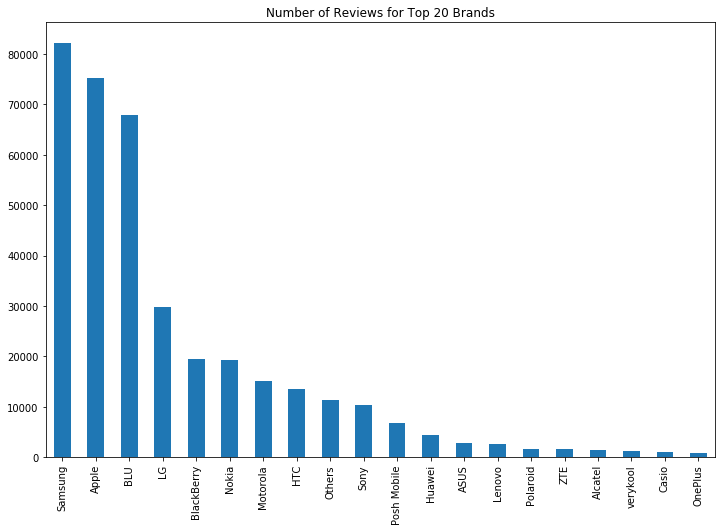

In [379]:
# Plot number of reviews for top 20 brands
brands = cleanDF["Brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

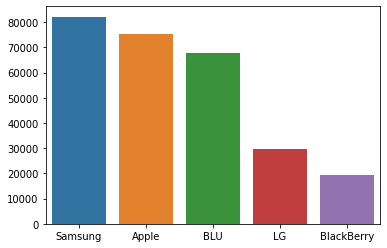

In [381]:
# Plot number of reviews for top 20 brands
brands = cleanDF["Brand"].value_counts()
type(brands[:5])
sns.barplot(brands[:5].index, brands[:5].values)


In [376]:
rating = cleanDF.groupby(
    'Brand'
    ).Rating.agg(
        #['count', 'mean']
        ['count', 'mean']
    ).sort_values(
        'count', ascending=False
    )
rating.head(15)

,count,mean
Brand,,
Samsung,82134,3.962220
Apple,75214,3.887774
BLU,67794,3.768165
LG,29731,3.878645
BlackBerry,19429,3.750631
Nokia,19216,3.808181
Motorola,15161,3.794736
HTC,13464,3.469251
Others,11367,3.443829


In [377]:
rating = cleanDF.groupby(
    'Brand'
    ).Rating.agg(
        #['count', 'mean']
        ['count', 'mean']
    ).sort_values(
        'mean', ascending=False
    )
rating.head(15)

,count,mean
Brand,,
AKUA,4,5.000000
Aeku,2,5.000000
Honor,356,4.446629
Huawei,4482,4.269523
HTM,24,4.250000
Kyocera,244,4.155738
OnePlus,925,4.144865
ZTE,1717,4.085032
Alcatel,1438,4.049374


Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

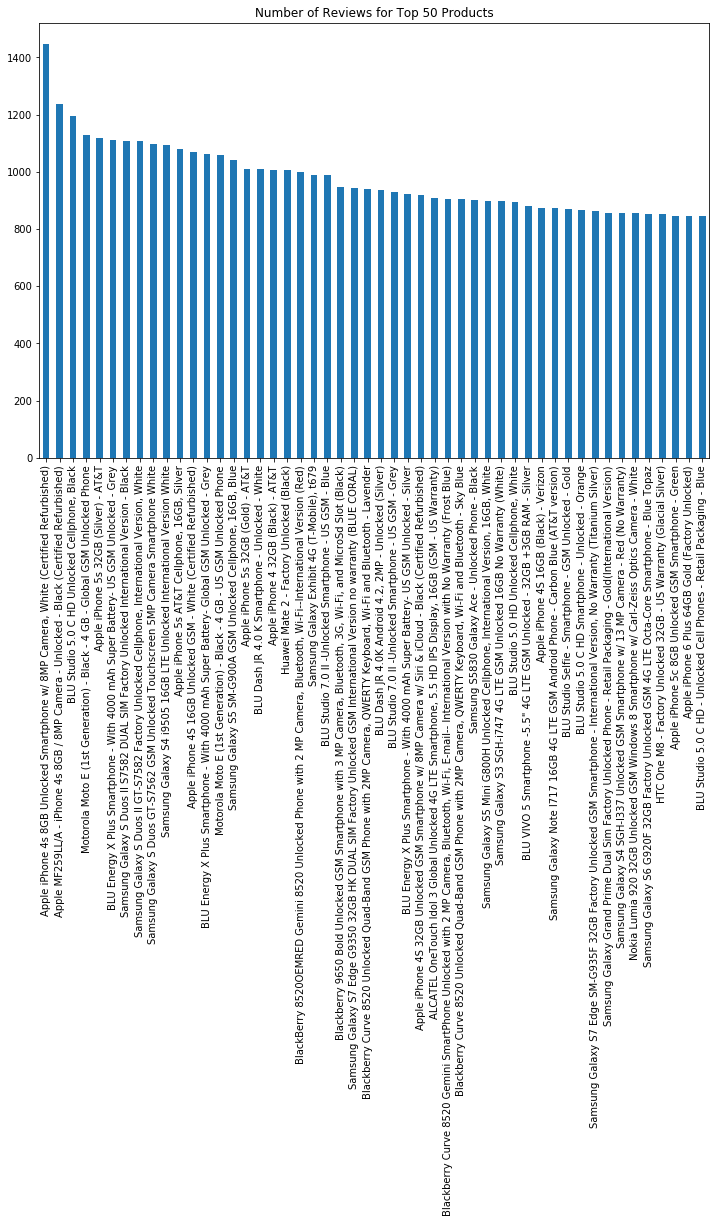

In [382]:
# Plot number of reviews for top 50 products
products =cleanDF["Product"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

[Text(0, 0, 'Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black'),
 Text(0, 0, 'Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White'),
 Text(0, 0, 'Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White'),
 Text(0, 0, 'Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White'),
 Text(0, 0, 'Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, Blue'),
 Text(0, 0, 'Samsung Galaxy Exhibit 4G (T-Mobile), t679'),
 Text(0, 0, 'Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM Factory Unlocked GSM International Version no warranty (BLUE CORAL)'),
 Text(0, 0, 'Samsung S5830 Galaxy Ace - Unlocked Phone - Black'),
 Text(0, 0, 'Samsung Galaxy S5 Mini G800H Unlocked Cellphone, International Version, 16GB, White'),
 Text(0, 0, 'Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked 16GB No Warranty (White)'),
 Text(0, 0, 'Samsung Galaxy Note I717 16GB 4G LTE GSM Android Phone - Carbon Blue (

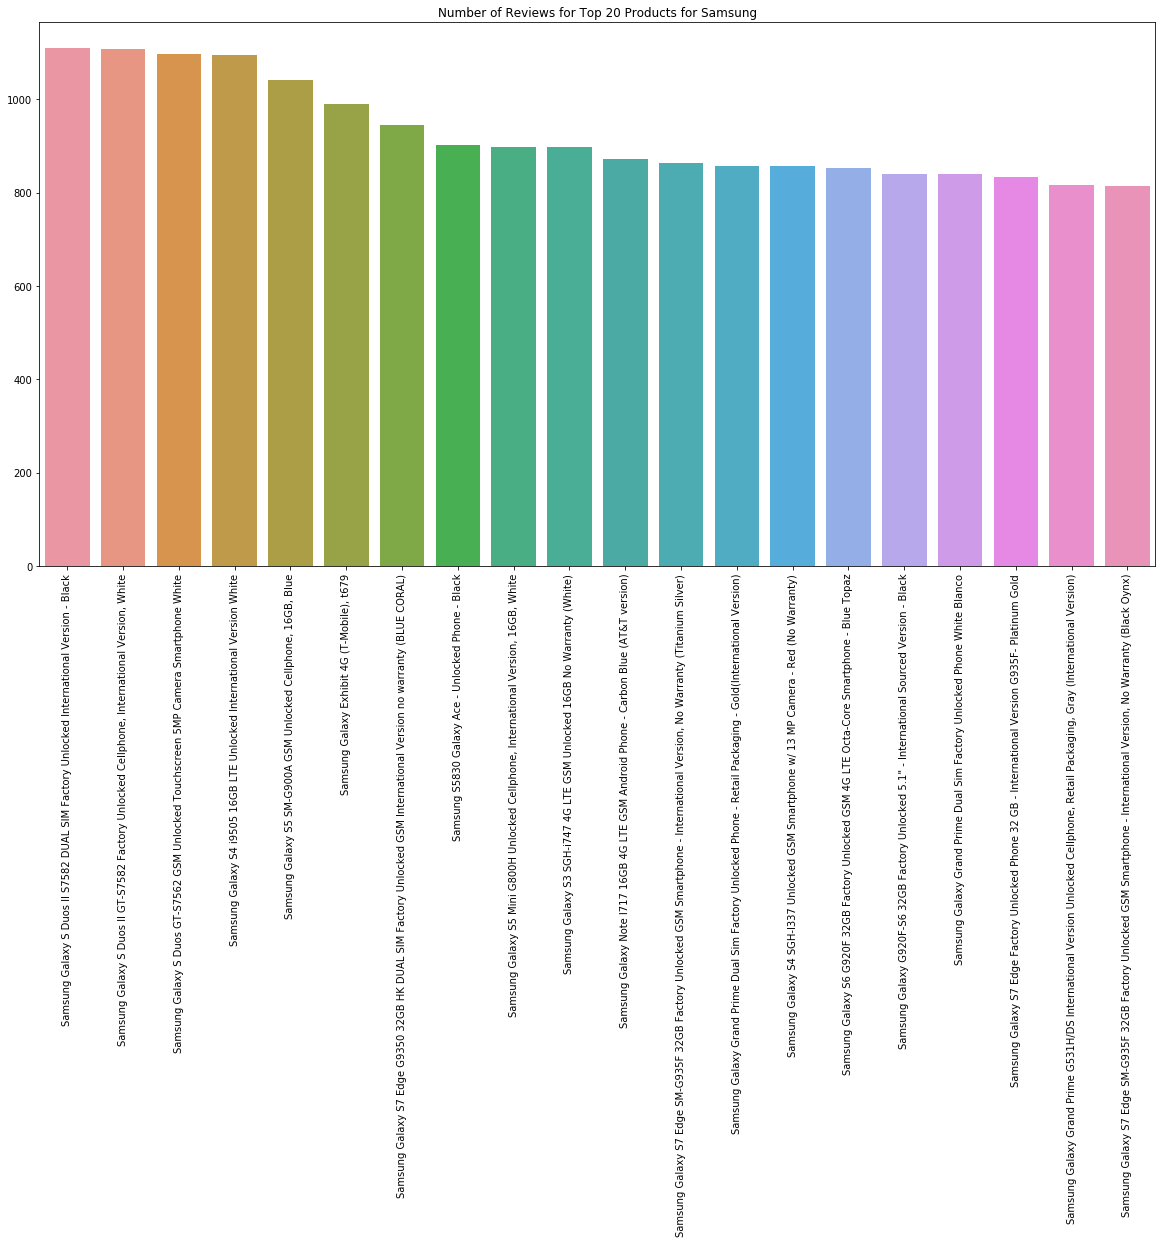

In [390]:
# Plot number of reviews for top 20 products for Samsung
products = cleanDF[cleanDF['Brand'] == 'Samsung']["Product"].value_counts()
plt.figure(figsize=(20,10))
plt.title("Number of Reviews for Top 20 Products for Samsung")
ax = sns.barplot(products[:20].index, products[:20].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [274]:
otherBrand = newData.loc[newData['Brand'] == 'Others']

In [369]:
countDF = pd.DataFrame(otherBrand.groupby('Product')['Reviews'].count())
countDF.sort_values(['Reviews'], ascending=False)


,Reviews
Product,
"Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)",1448
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished),1238
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink,1129
CNPGD All-in-1 Watch Cell Phone & Smart Watch Sync to Android IOS Smart Phone (Black Plus),1016
Apple iPhone 4S 32GB Unlocked GSM Smartphone w/ 8MP Camera w/ Siri & iCloud - Black (Certified Refurbished),919
...,...
ThL W8S Quad Core Smart Phone 32GB ROM 5.0 Inch HD IPS Screen Android 4.2 Unlocked Phone(White),1
IPRO i950A 5 Inch 8G Unlocked Smartphone-International Version with Warranty (White),1
"Indigi 2-in-1 SmartPhone 3G + WiFi Phablet Tablet PC 7"" Android 4.4 GSM UNLOCKED",1


In [204]:
newData.head(200)

,Product,Brand,Price,Rating,Reviews,ReviewVotes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
195,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,Others,59.99,2,My Granny couldn't use the phone because she w...,1.0
196,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,Others,59.99,2,"Not good sound, not easily used by senior, end...",0.0
197,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,Others,59.99,5,"really surprised by this phone, with fm radio ...",0.0
198,[XMAS DEAL] Jethro [SC118] Simple Unlocked Qua...,Others,59.99,5,Nice big numbers everywhere! Simple too!,0.0


In [20]:
## Reviews
Reviews = myData['Reviews']
sample_review = Reviews[:100] 
sample_review

0     I feel so LUCKY to have found this used (phone...
1     nice phone, nice up grade from my pantach revu...
2                                          Very pleased
3     It works good but it goes slow sometimes but i...
4     Great phone to replace my lost phone. The only...
                            ...                        
95                                            very well
96                        Cannot connect to GSM network
97    This cell phone exceeded my expectations, it's...
98    pros.. it works fine, its easy to use, not too...
99    I went through lots of reviews for different p...
Name: Reviews, Length: 100, dtype: object

### Data Cleaning and Text Preprocessing/Analysis

In [391]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
#from nltk import stopwords
import re
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = myData["Reviews"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'reading book'

In [392]:
mystopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [395]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

##stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in mystopwords]
    return text

def tokenize(msg):
    word_tokens = word_tokenize(msg)
    return word_tokens

ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

In [396]:
def datapreprocessing(review):
    
    # Convert the text into lowercase
    review = to_lowercase(review)
    
    # Remove punctuation
    review = remove_punct(review)
    
    # Tokenization
    review = word_tokenize(review)
    
    # Remove stopwords
    review = remove_stopwords(review)
    
    # Lemmatization
    review = lemmatizer(review)
    
    return review

In [11]:
sample = myData['Reviews'][:100]

In [397]:
sample = sample.apply(lambda x: datapreprocessing(x))
sample

NameError: name 'sample' is not defined

In [399]:
cleanDF['TokenizeReviews'] = cleanDF['Reviews'].apply(lambda x: datapreprocessing(x))

In [18]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize(msg):
    word_tokens = word_tokenize(msg)
    return word_tokens

def remove_punction_and_stopwords(msg):
   stop_words = set(stopwords.words('english'))
   word_tokens = word_tokenize(msg.lower())
   #print(word_tokens)
   filtered_words = [w for w in msg if w not in word_tokens]
   print(filtered_words)
   new_sentence = ''.join(filtered_words)
   return new_sentence

In [297]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import numpy
import re
from bs4 import BeautifulSoup
stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')
stop
def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","is",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)    
    phrase=re.sub(r"\'t","not",sentence)
    phrase=re.sub(r"\'ve","have",sentence)
    phrase=re.sub(r"\'m","am",sentence)
    return phrase
preprocessed_reviews=[]
for sentence in myData['Reviews'][:10].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=decontracted(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence='  '.join(snow.stem(e.lower()) for e in sentence.split() if e.lower() not in stop)
    preprocessed_reviews.append(sentence.strip())

In [299]:
preprocessed_reviews

['feel  lucki  found  use  phone  us  use  hard  phone  line  someon  upgrad  sold  one  son  like  old  one  final  fell  apart  year  want  upgrad  thank  seller  realli  appreci  honesti  said  use  phone  recommend  seller  high  would',
 'nice  phone  nice  grade  pantach  revu  clean  set  easi  set  never  android  phone  fantast  say  least  perfect  size  surf  social  media  great  phone  samsung',
 'pleas',
 'work  good  goe  slow  sometim  good  phone  love',
 'great  phone  replac  lost  phone  thing  volum  button  work  still  go  set  adjust  job  elig  upgrad  phone  thaank',
 'alreadi  phone  problem  know  state  use  dang  state  charg  wish  would  read  comment  would  purchas  item  crack  side  damag  good  tri  charg  anoth  way  work  request  money  back  get  money  back  sign  unhappi  custom',
 'charg  port  loos  got  solder  need  new  batteri  well  later  includ  cost  purchas  usabl  phone  phone  sold  state',
 'phone  look  good  stay  charg  buy  n

### NLTK function to find sentiment value and sentiment

In [408]:
# Python program to convert a list 
# to string using join() function 
    
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
        
        
# Driver code     
s = ['Geeks', 'for', 'Geeks'] 
print(listToString(s))  
        

Geeks for Geeks


In [409]:
## Reviews
Reviews = cleanDF['TokenizeReviews'].apply(lambda x: listToString(x))
#sample_review = Reviews[:100] 

In [410]:
Reviews

0         feel lucky phone hard phone upgraded sold son ...
1         nice phone nice grade pantach revue clean set ...
2                                                   pleased
3                            work good slow good phone love
4         great phone replace lost phone thing volume bu...
                                ...                        
372499    delivery expectation great phone longer cricke...
372500          unable dil receive call useless waste money
372501          service connect ergo portal phone worthless
372502    copy answer provided earlierdo buy phone compa...
372503    thing basic work gps locating slow sketchy set...
Name: TokenizeReviews, Length: 372504, dtype: object

In [411]:
sentiment = SentimentIntensityAnalyzer()

polarity = []
for sentences in Reviews:
    # print(sentences)   
    ss = sentiment.polarity_scores(sentences)
    # for k in sorted(ss):
        # print('{0}: {1}, '.format(k, ss[k]))
 
    if ss['compound'] >= 0.05 : 
        # print("Positive") 
        polarity.append("1")
        
    elif ss['compound'] <= -0.05 : 
        # print("Negative") 
        polarity.append("-1")
    else : 
        # print("Neutral") 
        polarity.append("0")

review_polarity = [(i, polarity.count(i)) for i in set(polarity)]
print(review_polarity)

[('-1', 58282), ('1', 243667), ('0', 70555)]


In [421]:
# Create new DF
polarity = pd.DataFrame(data=polarity, columns=["Polarity"])
polarity.reset_index(drop=True, inplace=True)
cleanDF.reset_index(drop=True, inplace=True)
newDF = pd.concat([cleanDF, polarity], axis=1)   #Add category column

In [414]:
newDF = newDF.head(100)
newDF

,Product,Brand,Price,Rating,Reviews,ReviewVotes,TokenizeReviews,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,"[feel, lucky, phone, hard, phone, upgraded, so...",1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,"[nice, phone, nice, grade, pantach, revue, cle...",1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,[pleased],1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[work, good, slow, good, phone, love]",1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,"[great, phone, replace, lost, phone, thing, vo...",1
...,...,...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0,[],0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0,"[connect, gsm, network]",0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0,"[cell, phone, exceeded, expectation, user, fri...",1
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0,"[pro, work, fine, easy, heavycons, apps, andro...",1


In [426]:
df = pd.DataFrame(newDF)
df.to_csv (r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Sem 2\Project\Dataset\finalDF.csv', index = False, header=True)

In [422]:
x_train, x_test, y_train, y_test = train_test_split(
    newDF.Reviews, newDF.Polarity, random_state=0)
x_train.isnull().sum()

0

In [423]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

scores = cross_val_score(LogisticRegression(solver='lbfgs', multi_class='auto'), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

X_train:
<279378x20131 sparse matrix of type '<class 'numpy.int64'>'
	with 7551571 stored elements in Compressed Sparse Row format>
Number of features: 20131


C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Mean cross-validation accuracy: 0.939


C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [424]:
#!pip install xgboost
from xgboost import XGBClassifier

scores = cross_val_score(XGBClassifier(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.924


In [418]:
from sklearn.naive_bayes import GaussianNB

scores = cross_val_score(GaussianNB(), X_train.todense(), y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.790


In [428]:
logreg = LogisticRegression(C=0.1, solver='lbfgs', multi_class='auto', max_iter=3000).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy:   0.945
Training set score: 0.952
Test set score: 0.945


In [429]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
#print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))


Confusion matrix:
[[12255   884  1405]
 [  341 16483   710]
 [ 1001   786 59261]]

---------------


Logistic Reg - F1 score: 0.921


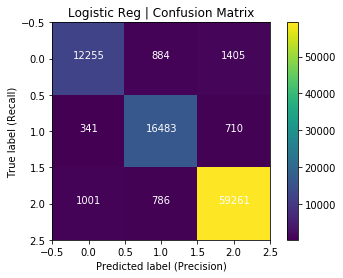

In [430]:
plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

log_f1 = f1_score(y_test, log_y_pred, average='macro')
print("Logistic Reg - F1 score: {:.3f}".format(log_f1))

In [431]:
testing2 = pd.pivot_table(newDF,index=['Brand'],values=['Rating', 'ReviewVotes','Polarity'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                  mean            
            Rating ReviewVotes    Rating ReviewVotes
Brand                                               
Samsung     325433      119813  3.962220    1.498712
Apple       292415      143945  3.887774    1.984791
BLU         255459       66198  3.768165    1.006814
LG          115316       30478  3.878645    1.057860
Nokia        73178       29141  3.808181    1.570435
BlackBerry   72871       23712  3.750631    1.247606
Motorola     57532       25776  3.794736    1.752754
HTC          46710       13647  3.469251    1.042870
Sony         40026       15812  3.889418    1.578674
Others       39146       27384  3.443829    2.477966

In [38]:
testing2 = pd.pivot_table(newDF,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                   mean             
           Rating Review Votes    Rating Review Votes
Brand Name                                           
Nokia         266           96  4.222222     1.523810
Samsung       137           32  3.702703     0.864865

In [8]:
from tqdm.notebook import tqdm
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

filepath = 'C:/Users/FORGE-15 I7/OneDrive - AsiaPay Limited/Sem 2/Project/Dataset/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
# emolex_df.head(12)

emolex_df.emotion.unique()
emolex_df.emotion.value_counts()

emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abandonment,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0
2,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14173,zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14174,zoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14175,zoological,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14176,zoology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
new_df = pd.DataFrame(data=Reviews.head(100))
new_df

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
95,very well
96,Cannot connect to GSM network
97,"This cell phone exceeded my expectations, it's..."
98,"pros.. it works fine, its easy to use, not too..."


In [10]:
emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
emolex_df

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141815,zoom,negative,0
141816,zoom,positive,0
141817,zoom,sadness,0
141818,zoom,surprise,0


In [11]:
emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,0,0,0,0,0,0,0,0,0,0
14178,zoo,0,0,0,0,0,0,0,0,0,0
14179,zoological,0,0,0,0,0,0,0,0,0,0
14180,zoology,0,0,0,0,0,0,0,0,0,0


In [12]:
emotions = emolex_words.columns.drop('word')
emotions

Index(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'],
      dtype='object', name='emotion')

In [13]:
emo_df = pd.DataFrame(0, index=new_df.index, columns=emotions)
emo_df

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0


In [14]:
stemmer = SnowballStemmer("english")

with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i]['Reviews'])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                print(emo_score)
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

new_df = pd.concat([new_df, emolex_df], axis=1)


Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
4818     feel      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
4818           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
5174     found      0             0        0   

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11191    seller      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11191          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5974     high      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
5974           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Column

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
14066    work      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
14066          0         0      0  
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5528     good      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
5528           0         1      1  
Empty DataFrame
Columns: [

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone    

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
14066    work      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
14066          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion     word  anger  anticipation  disgust  fear  joy  negative  positive  \
10571    request      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
10571          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Colu

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
3208     decent      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
3208           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Ind

Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9687     press      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9687           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
12865    top      0             1        0     0    0         0         1   

emotion  sadness  surprise  trust  
12865          0         0      1  
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
1669     button      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
1669           0         0      0  
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
11272    sever      0             0        0     0    0         1         0   

emotion  sa

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
1811     care      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
1811           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
7471     long      0             1        0     0    0         0         0   

emotion  sadness  surprise  trust  
7471           0         0      0  
Empty DataFrame
Columns: [

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
3166     day      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
3166           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
3865     doe      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
3865           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
11392    show      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11392          0         0      1  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [wo

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
10231    reason      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
10231          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
11961    star      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
11961          0         0      1  
emotion  word  anger  

emotion     word  anger  anticipation  disgust  fear  joy  negative  positive  \
2599     connect      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
2599           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
975      back      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
975            0         0      0  
emotion   word  ange

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
13624    vendor      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
13624          0         0      0  
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5974     high      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
5974           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipati

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11062    school      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11062          0         0      1  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Colu

emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
7401     listen      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
7401           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
10125    radio      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
10125          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Colu

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
4316     enjoy      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
4316           0         0     

emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
1025     band      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
1025           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: 

emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
7695     market      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
7695           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Ind

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
5174     found      0             0        0     0    1         0         1   

emotion  sadness  surprise  trust  
5174           0         0      1  
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
620      appeal      0             1        0     0    0         0         0   

emotion  sadness  surprise  trust  
620            0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty Data

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5528     good      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
5528           0         1      1  
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0   

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Column

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
14066    work      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
14066          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
1238     big      0             0        0     0 

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
12713    thing      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
12713          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion     word  anger  anticipation  disgust  fear  joy  negative  positive  \
9764     problem      0             0        0     1    0         1         0   

emotion  sadness  surprise  trust  
9764           1         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty Da

emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
7495     lose      1             0        1     1    0         1         0   

emotion  sadness  surprise  trust  
7495           1         1      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11436    signal      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11436          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Column

8568            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11993    status      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
11993          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive 

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, posi

emotion     word  anger  anticipation  disgust  fear  joy  negative  positive  \
9675     present      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
9675           0         1      1  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
I

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11453    silver      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11453          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, 

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion      word  anger  anticipation  disgust  fear  joy  negative  \
1709     calendar      0             0        0     0    0         0   

emotion  positive  sadness  surprise  trust  
1709            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surpri

emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
11523    skin      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11523          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns:

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
13162    type      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
13162          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: 

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
4525     excel      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
4525           0         1      1  
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Column

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion      word  anger  anticipation  disgust  fear  joy  negative  \
5282     function      0             0        0     0    0         0   

emotion  positive  sadness  surprise  trust  
5282            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
1716     call      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
1716           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Co

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
7498     lost      0             0        0     0    0         1         0   

emotion  sadness  surprise  trust  
7498           1         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns:

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
9440     pocket      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9440           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Ind

emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
12915    toy      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
12915          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
11685    social      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11685          0         0      0  
emotion     word  anger  anticipation  disgust  fear  joy  negative  positive  \
8370     network      0             1        0     0    0         0         0   

emotion  sadness  surprise  trust  
8370           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty 

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
11610    small      0             0        0     0    0         1         0   

emotion  sadness  surprise  trust  
11610          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index

12713          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust,

5282            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
3

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
14066    work      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
14066          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: 

In [21]:
def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotions
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()

    filepath = 'C:/Users/FORGE-15 I7/OneDrive - AsiaPay Limited/Sem 2/Project/Dataset/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

    
    book = ''
    chapter = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df


In [22]:
new_df

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
95,very well
96,Cannot connect to GSM network
97,"This cell phone exceeded my expectations, it's..."
98,"pros.. it works fine, its easy to use, not too..."


In [23]:
hp_df = text_emotion(new_df, 'Reviews')
hp_df

,Reviews,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,I feel so LUCKY to have found this used (phone...,0,0,0,0,1,1,2,1,0,2
1,"nice phone, nice up grade from my pantach revu...",0,1,0,0,2,0,2,0,0,2
2,Very pleased,0,0,0,0,0,0,0,0,0,0
3,It works good but it goes slow sometimes but i...,0,2,0,0,3,0,3,0,2,2
4,Great phone to replace my lost phone. The only...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,very well,0,0,0,0,0,0,0,0,0,0
96,Cannot connect to GSM network,0,1,0,0,0,0,0,0,0,0
97,"This cell phone exceeded my expectations, it's...",0,2,0,0,2,1,3,0,1,2
98,"pros.. it works fine, its easy to use, not too...",0,0,0,0,0,0,0,0,0,0


In [47]:
df_new = myData.head(10).groupby(myData['Product Name'])['Reviews'].sum()
df_new

Product Name
"CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D700*FRONT CAMERA*ANDROID*SLIDER*QWERTY KEYBOARD*TOUCH SCREEN    I feel so LUCKY to have found this used (phone...
Name: Reviews, dtype: object

In [44]:
df = pd.DataFrame({'ID': [1,1,2,2], 
                   'Date': ['01/01/2019', '01/01/2019', '01/02/2019', '01/02/2019'],
                   'Text': ['abcd', 'pqrs', 'abcd', 'xyze']})

df['Text'] = df['Text'].fillna('').astype(str)
df_grouped = df.groupby(['ID', 'Date'])['Text'].sum()
print(df_grouped)

ID  Date      
1   01/01/2019    abcdpqrs
2   01/02/2019    abcdxyze
Name: Text, dtype: object
